# 대선자료 시각화 

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
# Data 불러오기
election = pd.read_csv("../Data/election_2022.csv")
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [4]:
# 기본 통계량 확인하기 : 개수, 평균, 표준편차, 1~4사분위수, 최대값 등등
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [5]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [7]:
# dimension 확인하기
election.shape

(248, 7)

In [9]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [15]:
# 전체 컬럼에 대해 NaN 확인
election.isnull().sum()
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

---
### 혁도의 부재

In [17]:
election['electionSum'] = election[['이재명','윤석열','심상정']].sum(axis=1)
# election.iloc[:, 4:7].sum(axis=1)
# election.loc[:,'이재명':'심상정']
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [19]:
election['electionRatio'] = round(election['electionSum'] / election['투표수']*100,2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [30]:
vote_rate = election.groupby("광역시도").sum()
vote_rate = vote_rate.투표수
vote_rate = vote_rate.sort_values(ascending=False)
vote_rate

광역시도
경기도        8518854
서울특별시      6501831
부산광역시      2200224
경상남도       2146882
인천광역시      1883504
경상북도       1774284
대구광역시      1611512
충청남도       1324660
전라남도       1282168
전라북도       1235212
강원도        1015458
광주광역시       985492
충청북도        962333
대전광역시       945308
울산광역시       735461
제주특별자치도     409649
세종특별자치시     231832
Name: 투표수, dtype: int64

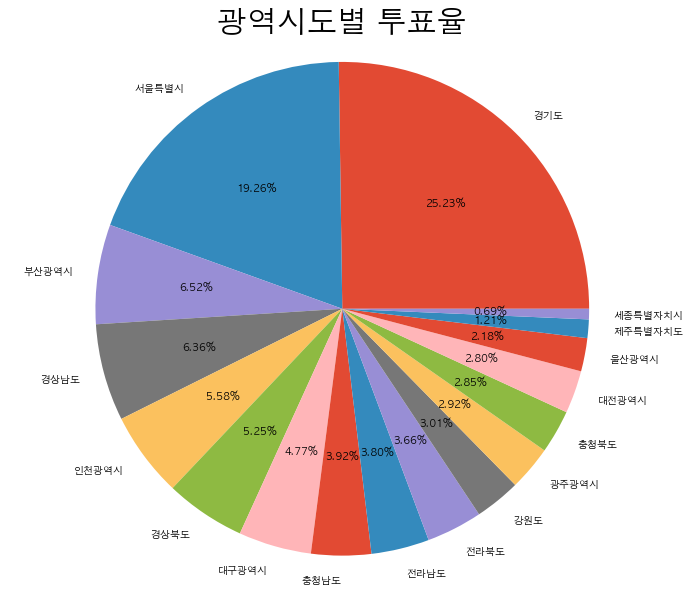

In [38]:
plt.style.use("ggplot")
# 파이차트 그리기
vote_rate.plot(
  kind = "pie",
  figsize = (12,10),
  autopct = "%.2f%%", # 자동으로 퍼센트 만들어서 보여주기 (%.2f --> float 소수점 2째자리까지), (%% --> % 글자 출력)
)

plt.title("광역시도별 투표율", size = 30)
plt.axis("equal") # 가끔 파이차트가 찌그러질때가 있는데 그때를 위해서 쓰는 코드
plt.ylabel("")

plt.show()

In [46]:
nvote = vote_rate[:5]
nvote["기타"] = vote_rate[5:].sum()
nvote

광역시도
경기도       8518854
서울특별시     6501831
부산광역시     2200224
경상남도      2146882
인천광역시     1883504
기타       12513369
Name: 투표수, dtype: int64

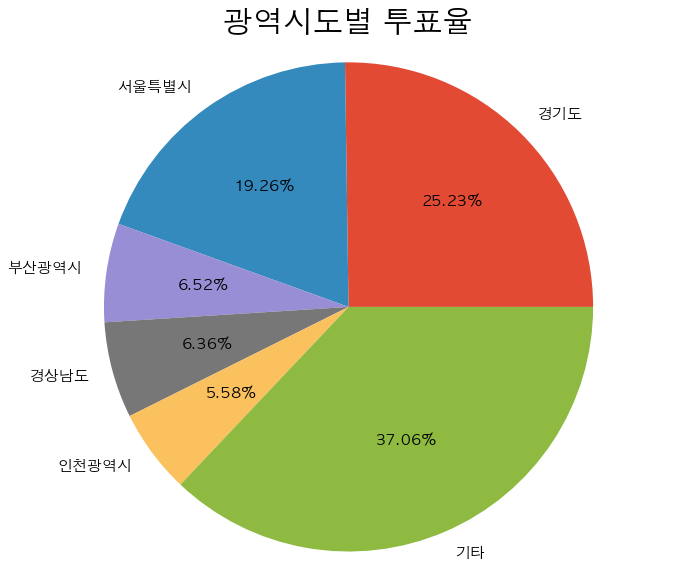

In [50]:
plt.style.use("ggplot")
# 파이차트 그리기
nvote.plot(
  kind = "pie",
  figsize = (12,10),
  autopct = "%.2f%%", # 자동으로 퍼센트 만들어서 보여주기 (%.2f --> float 소수점 2째자리까지), (%% --> % 글자 출력)
  textprops={"size":15}
)

plt.title("광역시도별 투표율", size = 30)
plt.axis("equal") # 가끔 파이차트가 찌그러질때가 있는데 그때를 위해서 쓰는 코드
plt.ylabel("")

plt.show()

---
# 선생님 방법

In [54]:
# pivot을 이용하여 광역시별 투표수를 합계로 그룹화하여 집계한다.
elec_sum = election.pivot_table("투표수", index="광역시도", aggfunc=sum)
# 투표수별 순차를 내림차순으로 정렬
elec_sum = elec_sum.sort_values(by="투표수",ascending=False)
elec_sum

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168


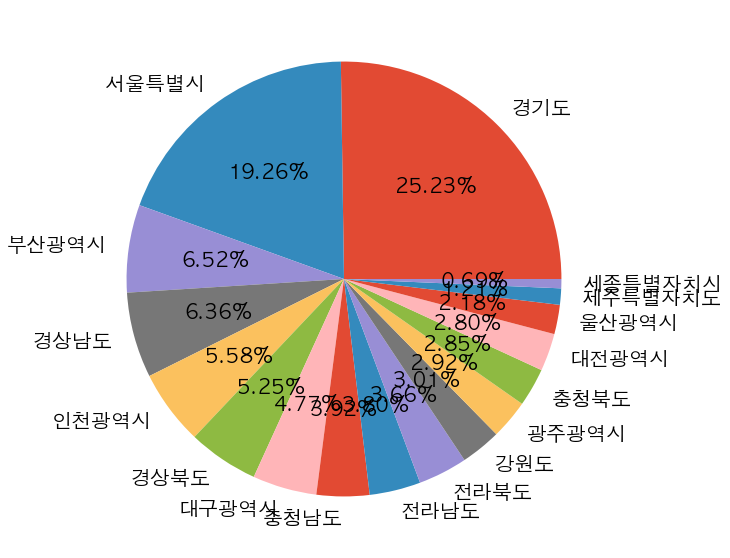

In [60]:
data = elec_sum["투표수"]
categories = list(elec_sum.index)

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 20

plt.pie(
  data,
  labels=categories,
  autopct="%.2f%%",
)
plt.show()

---
### 윤석열 후보의 광역시도별 득표율

In [61]:
# pivot을 이용하여 광역시별 투표수를 합계로 그룹화하여 집계한다.
yoon_sum = election.pivot_table("윤석열", index="광역시도", aggfunc=sum)
# 투표수별 순차를 내림차순으로 정렬
yoon_sum = yoon_sum.sort_values(by="윤석열",ascending=False)
yoon_sum

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


In [68]:
plt.style.use("default")

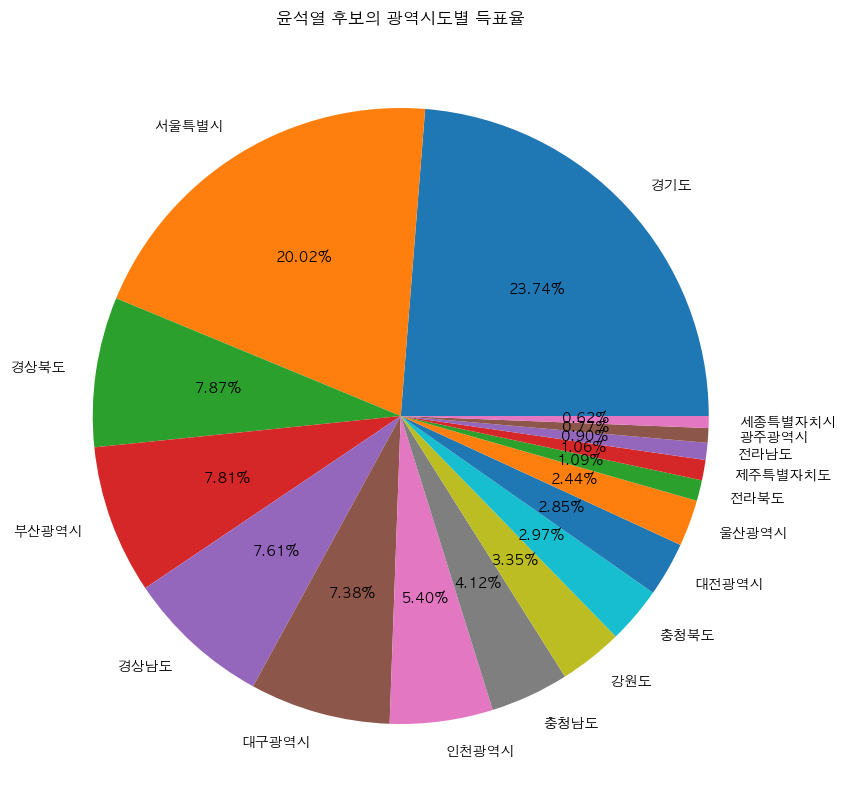

In [71]:
data = yoon_sum["윤석열"]
categories = list(yoon_sum.index)


plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 10

plt.pie(
  data,
  labels=categories,
  autopct="%.2f%%",
)
plt.title("윤석열 후보의 광역시도별 득표율")
plt.show()

---
### 이재명 후보의 광역시도별 득표율

In [73]:
# pivot을 이용하여 광역시별 투표수를 합계로 그룹화하여 집계한다.
lee_sum = election.pivot_table("이재명", index="광역시도", aggfunc=sum)
# 투표수별 순차를 내림차순으로 정렬
lee_sum = lee_sum.sort_values(by="이재명",ascending=False)
lee_sum

,이재명
광역시도,
경기도,4297931
서울특별시,2944981
전라남도,1094872
전라북도,1016863
인천광역시,913320
부산광역시,831896
광주광역시,830058
경상남도,794130
충청남도,589991


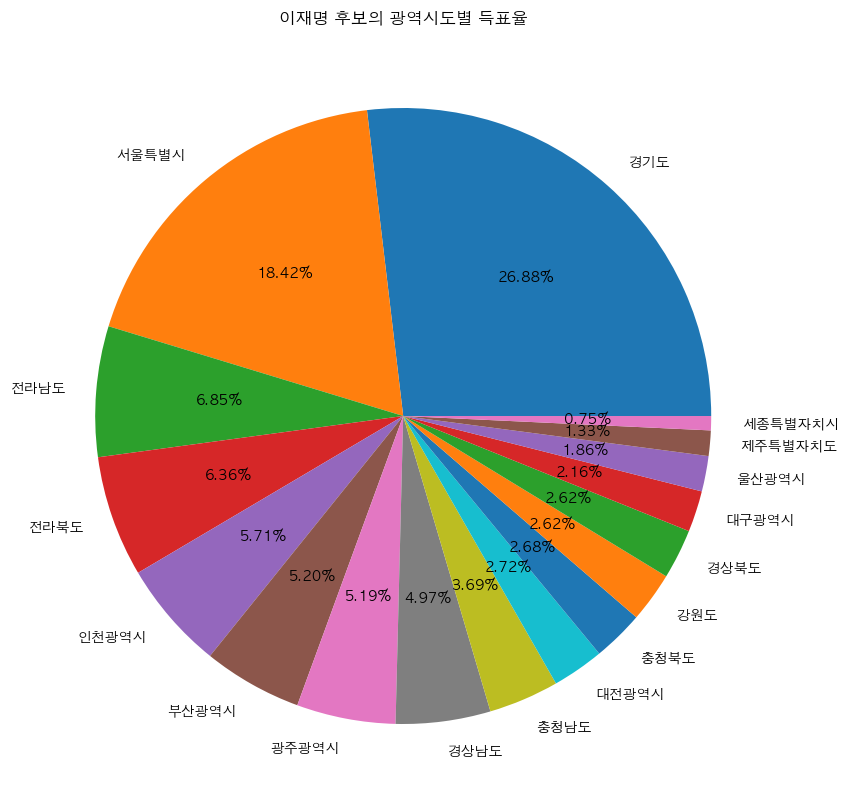

In [74]:
data = lee_sum["이재명"]
categories = list(lee_sum.index)


plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 10

plt.pie(
  data,
  labels=categories,
  autopct="%.2f%%",
)
plt.title("이재명 후보의 광역시도별 득표율")
plt.show()

---
### 윤석열 후보의 서울 득표 Top5

In [96]:
yoon_seoul = election.loc[election.광역시도 == "서울특별시",["시군구", "윤석열"]]
yoon_seoul = yoon_seoul.set_index("시군구")
yoon_seoul.sort_values(by="윤석열", ascending=False, inplace=True)

In [97]:
yoon_seoul_top5 = yoon_seoul[:5]
yoon_seoul_top5.loc["기타",] = yoon_seoul[5:].sum()
yoon_seoul_top5

/var/folders/51/xmc_l6t13wv1nc5z6qmyg58r0000gn/T/ipykernel_1622/2996563637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoon_seoul_top5.loc["기타",] = yoon_seoul[5:].sum()


,윤석열
시군구,
송파구,255166.0
강남구,235897.0
강서구,181510.0
서초구,179472.0
노원구,163340.0
기타,2240362.0


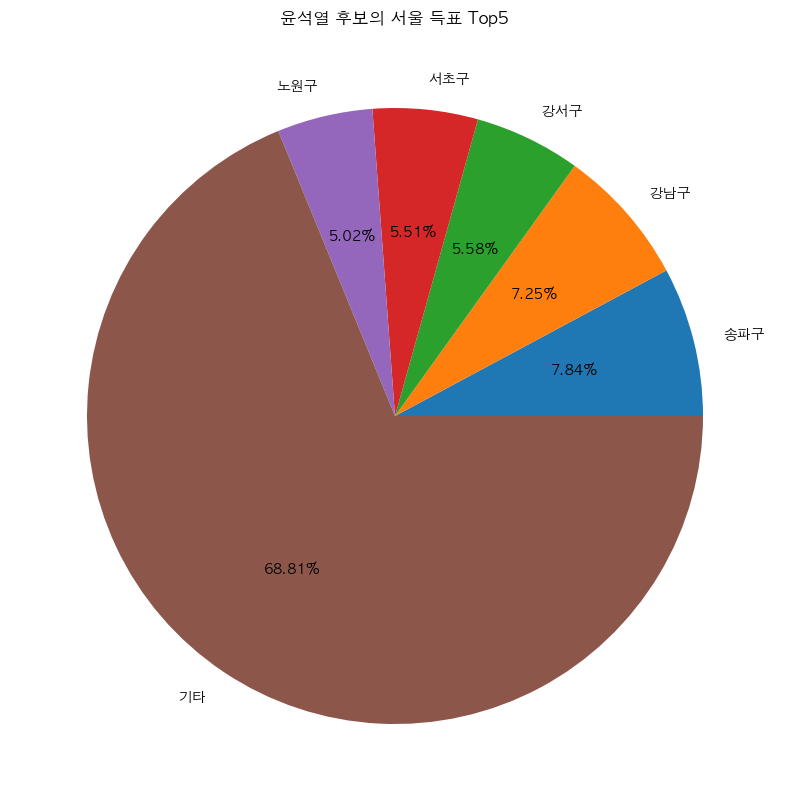

In [98]:
data = yoon_seoul_top5["윤석열"]
categories = list(yoon_seoul_top5.index)


plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 10

plt.pie(
  data,
  labels=categories,
  autopct="%.2f%%",
)
plt.title("윤석열 후보의 서울 득표 Top5")
plt.show()